In [1]:
import torch
from torchvision import utils
from torchvision import models
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt

## Modelo pre-entrenado

In [2]:
inception = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth


Adquiriendo nuestra imagen

In [4]:
url = 'https://static.iris.net.co/sostenibilidad/upload/images/2019/2/20/43051_1.jpg'
image = request.urlretrieve(url, 'test.jpg')
img = Image.open(image[0])
img

Output hidden; open in https://colab.research.google.com to view.

Se realiza el preprocesamiento del modelo, componiendo la transformación de este en un redimencionamiento de la imagen, centrado de imagen, llevando la imagen a tensor y normalizando la imagen, empleando los valores de la media y desviación estándar del modelo:



In [5]:
preprocess = transforms.Compose([
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(
        #estos datos sirven para normalizar las imagenes
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

Se transpone la imagen preprocesada y se grafica esta permutandola

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


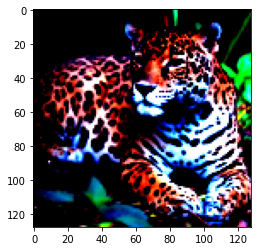

In [7]:
img_t = preprocess(img)

#agregamos una dimension extra
batch = torch.unsqueeze(img_t, 0)

#al ser  img_t un tensor, necesitamos permutarla cambiando las dimensiones al orden adecuado
plt.imshow(img_t.permute(1, 2, 0))

Lo enviamos al modelo

In [8]:
inception.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

Se observa la salida que genera el modelo inception:


In [10]:
out = inception(batch)
out
# observamos la representacion en forma de tensor numerico de nuestra imagen

tensor([[-1.9298e-01, -2.9606e-02,  3.5547e-01, -1.2459e+00, -3.2230e+00,
         -2.9298e+00, -3.6335e+00,  1.4311e+00,  4.5108e+00, -3.4745e+00,
          5.2219e+00, -1.2182e+00, -2.7863e+00, -7.0940e-01,  1.0220e+00,
         -7.8187e-01,  2.7211e+00,  4.6929e-01, -5.1414e+00, -8.3194e-01,
         -4.0980e+00, -3.3592e+00, -5.1152e+00, -2.0389e+00, -1.7834e+00,
         -3.5719e+00, -1.3095e+00, -5.4593e+00, -4.6882e-01, -1.0905e-01,
          3.2654e-01,  1.8200e+00,  3.6861e+00,  2.3782e+00,  6.5483e-01,
         -2.3833e+00,  8.7482e+00, -4.4629e-01,  3.8611e+00,  2.9318e-01,
         -1.6872e+00,  1.4691e+00, -3.3154e+00,  1.1411e+00, -3.6009e+00,
          5.2169e-01,  1.9585e+00,  1.8910e+00,  1.0974e+00,  2.4542e+00,
         -3.1400e+00,  5.8614e-01, -7.0043e+00, -2.9538e+00, -5.1877e-01,
         -1.5132e-02, -3.8815e+00, -5.0717e+00, -3.7270e+00,  1.6791e+00,
         -1.2248e+00,  1.8153e+00, -1.3199e+00,  2.4035e+00, -1.2959e+00,
          3.4926e+00, -7.7509e+00,  1.

Se descargan y almacenan en una lista las etiquetas o labels de comparación para la imagen procesada en el modelo:



In [13]:
request.urlretrieve('https://gist.githubusercontent.com/ykro/acb00a36f737c12013f6e0f8a0d2cb61/raw/a2bb113b83e274048992f6550050a437fa4db76d/imagenet_classes.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

Se obseva de nuevo la salida del modelo:



In [14]:
out

tensor([[-1.9298e-01, -2.9606e-02,  3.5547e-01, -1.2459e+00, -3.2230e+00,
         -2.9298e+00, -3.6335e+00,  1.4311e+00,  4.5108e+00, -3.4745e+00,
          5.2219e+00, -1.2182e+00, -2.7863e+00, -7.0940e-01,  1.0220e+00,
         -7.8187e-01,  2.7211e+00,  4.6929e-01, -5.1414e+00, -8.3194e-01,
         -4.0980e+00, -3.3592e+00, -5.1152e+00, -2.0389e+00, -1.7834e+00,
         -3.5719e+00, -1.3095e+00, -5.4593e+00, -4.6882e-01, -1.0905e-01,
          3.2654e-01,  1.8200e+00,  3.6861e+00,  2.3782e+00,  6.5483e-01,
         -2.3833e+00,  8.7482e+00, -4.4629e-01,  3.8611e+00,  2.9318e-01,
         -1.6872e+00,  1.4691e+00, -3.3154e+00,  1.1411e+00, -3.6009e+00,
          5.2169e-01,  1.9585e+00,  1.8910e+00,  1.0974e+00,  2.4542e+00,
         -3.1400e+00,  5.8614e-01, -7.0043e+00, -2.9538e+00, -5.1877e-01,
         -1.5132e-02, -3.8815e+00, -5.0717e+00, -3.7270e+00,  1.6791e+00,
         -1.2248e+00,  1.8153e+00, -1.3199e+00,  2.4035e+00, -1.2959e+00,
          3.4926e+00, -7.7509e+00,  1.

Se indexa el máximo valor de la salida:



In [16]:
_, index = torch.max(out, 1)


Se obtiene el porcentaje del valor máximo de aproximación en las coincidencias de identificación de la imagen:



In [17]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('jaguar, panther, Panthera onca, Felis onca', 98.94794464111328)

Se indexa nuevamente para obtener otras posibles coincidencias y se visualizan las demás coincidencias identificadas con sus respectivos porcentajes:

In [18]:
_, indices = torch.sort(out, descending=True)

top_five = indices[0][:5]
for i in top_five:
  print(labels[i], percentage[i].item())

jaguar, panther, Panthera onca, Felis onca 98.94794464111328
leopard, Panthera pardus 1.0520575046539307
cheetah, chetah, Acinonyx jubatus 3.236995667066367e-07
snow leopard, ounce, Panthera uncia 6.6328912848301336e-12
banjo 2.1025255104653584e-13


# Trabajando con un dataset

Se crea una ruta donde incicialmente se guarda el dataset que va a descargar crea el dataset que proviene de la biblioteca datasets que importa con ayuda del modulo CIFAR10 este proceso pide que se agregue la ruta donde se va a descargar, si el dataset es para entrenar y si es para bajar.

In [19]:
data_path = 'data/'
dataset = datasets.CIFAR10(data_path, train=True, download=True)
validation_set = datasets.CIFAR10(data_path, train=False, download=True)

Se descarga uno para entrenar y otro que no es para entrenar pero sí para validar si el entrenamiento fue correcto.
Se obtienen y describen todas las clases o clasificaciones del dataset que ha sido descargado y se observa el tamaño del dataset.

In [22]:
dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data/
    Split: Train

In [23]:
validation_set

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data/
    Split: Test

In [28]:
classes = ['airplane','automobile', 'bird','cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Se prueba algún componente del dataset, en este caso al ser imágenes se toma una de 50.000, también su etiqueta, y después se muestra la imagen con su etiqueta y clase. (todo esto para aprender y comprobar que todo está validado). Y se visualiza la imagen seleccionada.

In [32]:
img, label = dataset[50]
img, label, classes[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F6194B8B2E8>, 9, 'truck')

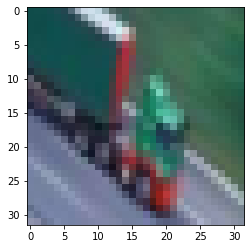

In [33]:
plt.imshow(img)

Convertirmos nuestra imagen en un tensor

Se transforma la imagen a tensor para su procesamiento posterior, usando para ello el método “transforms.ToTensor()” y se enlaza a una función a la cual se le arroja la imagen seleccionada, el tensor resultante de la transformación de la imagen (img) lo asignamos a img_tensor, en este caso.



In [37]:
tensor_transform = transforms.ToTensor()

img_tensor = tensor_transform(img)

img, img_tensor, img_tensor.shape

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F6194B8B2E8>,
 tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
          [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
          [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
          ...,
          [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
          [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
          [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],
 
         [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
          [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
          [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
          ...,
          [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
          [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
          [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],
 
         [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
          [0.2902, 0.2902, 0.2902,  ..., 0

Despues de esto se puede observar el tensor y su forma (cantidad de dimensiones y de filas(x)columnas, en ese orden)

Una vez se entiende como transformar una sola imagen se aplica al todo el dataset, con este fin se vuelve a importar el dataset, agregando esta transformacion “transforms.ToTensor()”) a todo lo que se obtenga, de esta forma se tendrá todo el dataset en forma de tensores.

In [39]:
# importo el mismo dataset,pero ahora como tensores directamente
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transforms.ToTensor())

Files already downloaded and verified


Se puede comprobar que en efecto, los datos importados se encuentran en modo de tensor.



In [41]:
img, label = dataset[50]
img
# ahora nuestras imagenes son todas tensores

tensor([[[0.0627, 0.0667, 0.0667,  ..., 0.2431, 0.2157, 0.2000],
         [0.0627, 0.0627, 0.0588,  ..., 0.2431, 0.2275, 0.2039],
         [0.0627, 0.0588, 0.0588,  ..., 0.2235, 0.2314, 0.2196],
         ...,
         [0.3765, 0.4471, 0.4667,  ..., 0.5020, 0.4706, 0.4588],
         [0.4627, 0.3922, 0.4471,  ..., 0.5451, 0.5137, 0.4745],
         [0.5647, 0.5333, 0.4118,  ..., 0.5686, 0.5373, 0.5137]],

        [[0.2980, 0.3020, 0.3020,  ..., 0.4157, 0.3882, 0.3686],
         [0.2980, 0.2980, 0.2941,  ..., 0.4275, 0.4118, 0.3922],
         [0.2980, 0.2941, 0.2941,  ..., 0.4314, 0.4353, 0.4275],
         ...,
         [0.4314, 0.4980, 0.5176,  ..., 0.5294, 0.5098, 0.5137],
         [0.5176, 0.4431, 0.4941,  ..., 0.5725, 0.5490, 0.5255],
         [0.5804, 0.5490, 0.4471,  ..., 0.5922, 0.5647, 0.5529]],

        [[0.2902, 0.2941, 0.2941,  ..., 0.3412, 0.3137, 0.2941],
         [0.2902, 0.2902, 0.2902,  ..., 0.3294, 0.3137, 0.2941],
         [0.2902, 0.2863, 0.2863,  ..., 0.3098, 0.3137, 0.

In [42]:
img.min(), img.max()

(tensor(0.0314), tensor(0.9529))

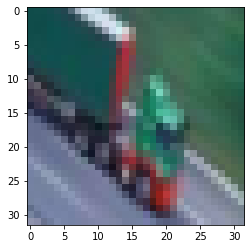

In [48]:
plt.imshow(img.permute(1,2,0))

In [49]:
imgs = torch.stack([img_tensor for img_tensor, _ in dataset], dim=3)

In [50]:
imgs.shape

torch.Size([3, 32, 32, 50000])

Obtenemos la media (mean) y la desviación estándar (std) de todo el dataset para así tener los parámetros necesarios de normalización y posteriormente hacer uso de estos datos para el entrenamiento,

In [51]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4915, 0.4823, 0.4468])

In [52]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

Con los datos de mediana (mean) y deviación estandar (std) ya se hace la transformación normalizada, como son varias las transformaciones que hay que hacer se hace una composición de transformaciones con el método ".Compose()"
dentro de este se coloca como parametros la transformación a Tensor y la normalizacion con “.Normalize((mean), (std))”.

In [59]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
        #estos datos sirven para normalizar las imagenes
  ])

Se realiza el mismo paso que antes para importar todo el dataset aplicandole la transformación a tensor con “transforms.ToTensor()”, solo que en lugar de transformarlo solo a tensor se le aplica la composición de transformaciones obtenida “transform”, así:



In [60]:
dataset = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)

Files already downloaded and verified


Por ultimo se trae otra imagen de el dataset recién creado con “transform” y probamos imprimir una imagen cualquiera, para verificar que todo está en orden.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'frog'

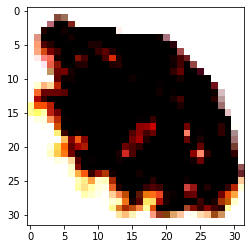

In [61]:
img_transformed,label = dataset[125]
plt.imshow(img_transformed.permute(1, 2, 0))
classes[label]